Task 1. Write a Python function that converts a temperature from Fahrenheit to Celsius. Use numpy.vectorize to apply this function to an array of temperatures: ```[32, 68, 100, 212, 77]```.

In [1]:
import numpy as np

In [2]:
def f_to_c(f):
    return (f - 32) * 5/9

temps_f = np.array([32, 68, 100, 212, 77])
vectorized = np.vectorize(f_to_c)
vectorized(temps_f).astype(int)

array([  0,  20,  37, 100,  25])

Task 2. Create a custom function that takes two arguments: a number and a power. Use numpy.vectorize to calculate the power for each pair of numbers in two arrays: ```[2, 3, 4, 5]``` and ```[1, 2, 3, 4]```.

In [3]:
def power(a, b):
    return a ** b

arr1 = np.array([2, 3, 4, 5])
arr2 = np.array([1, 2, 3, 4])

power(arr1, arr2)

array([  2,   9,  64, 625])

Task 3. Solve the system of equations using `numpy`:

$$
\begin{cases}
4x + 5y + 6z = 7 \\
3x - y + z = 4 \\
2x + y - 2z = 5
\end{cases}
$$

In [4]:
a = np.array(
    [[4, 5, 6],
     [3, -1, 1],
     [2, 1, -2]]
)

b = np.array([7, 4, 5])

x = np.linalg.solve(a, b)
x

array([ 1.7027027 ,  0.62162162, -0.48648649])

Task 4. Given the electrical circuit equations below, solve for $I_1, I_2, I_3$ (currents in the branches):

$$
\begin{cases}
10I_1 - 2I_2 + 3I_3 = 12 \\
-2I_1 + 8I_2 - I_3 = -5 \\
3I_1 - I_2 + 6I_3 = 15
\end{cases}
$$

In [5]:
a = np.array(
    [[10, -2, 3],
     [-2, 8, -1],
     [3, -1, 6]]
)

b = np.array([12, -5, 15])

x = np.linalg.solve(a, b)
x

array([ 0.48963731, -0.2253886 ,  2.21761658])

**Image Manipulation with NumPy and PIL**

Image file: `images/birds.jpg`. Your task is to perform the following image manipulations using the **NumPy** library while leveraging **PIL** for reading and saving the image.

**Instructions:**

1. **Flip the Image**:
   - Flip the image horizontally and vertically (left-to-right and up-to-down).

2. **Add Random Noise**:
   - Add random noise to the image.

3. **Brighten Channels**:
   - Increase the brightness of the channels (r.g. red channel) by a fixed value (e.g., 40). Clip the values to ensure they stay within the 0 to 255 range.

4. **Apply a Mask**:
   - Mask a rectangular region in the image (e.g., a 100x100 area in the center) by setting all pixel values in this region to black (0, 0, 0).

**Requirements:**
- Use the **PIL** module onyl to:
  - Read the image.
  - Convert numpy array to image.
  - Save the modified image back to a file.
- Perform all manipulations using NumPy functions. Avoid using image editing functions from PIL or other libraries.


**Bonus Challenge**:
- Create a function for each manipulation (e.g., `flip_image`, `add_noise`, `brighten_channels`, `apply_mask`) to promote modularity and reusability of code.

In [6]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [7]:
from PIL import Image

In [9]:
with Image.open('images/birds.jpg') as img:
    print(img.mode)
    img_arr = np.array(img)

RGB


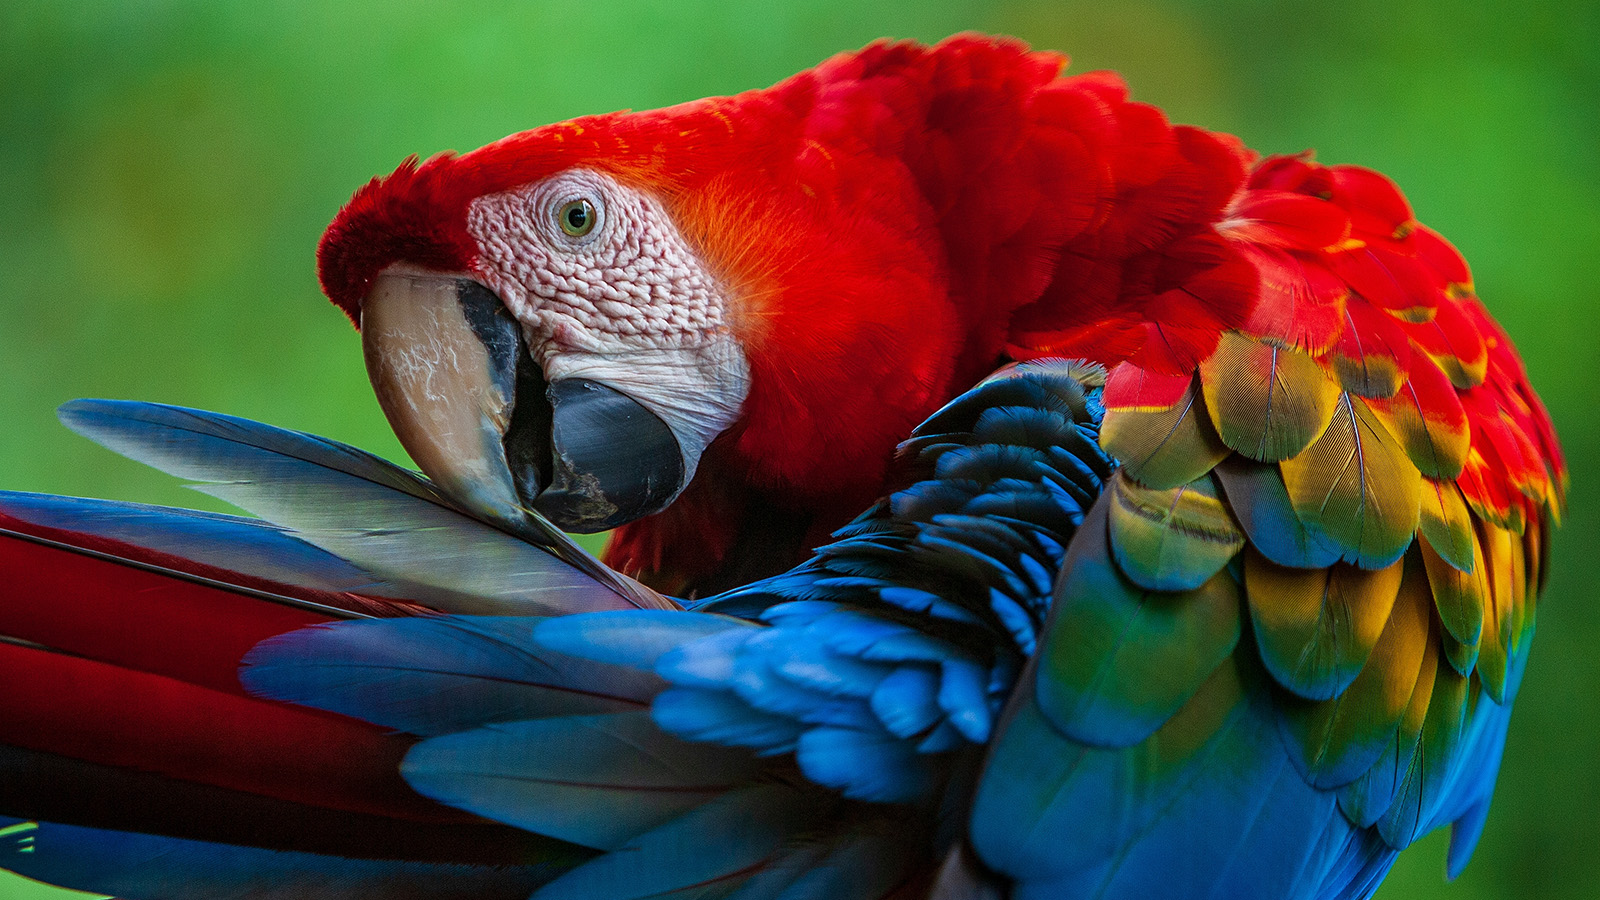

In [10]:
display(img)

In [11]:
def save(arr, name, mode):
    img = Image.fromarray(arr, mode)
    img.save(f"images/{name}.jpg")

In [12]:
img_arr

array([[[ 64, 125,  56],
        [ 62, 123,  54],
        [ 63, 124,  55],
        ...,
        [ 47, 110,  31],
        [ 39, 102,  23],
        [ 41, 104,  25]],

       [[ 60, 121,  52],
        [ 64, 125,  56],
        [ 64, 125,  56],
        ...,
        [ 42, 105,  26],
        [ 35,  98,  19],
        [ 44, 107,  28]],

       [[ 59, 120,  51],
        [ 65, 126,  57],
        [ 61, 122,  53],
        ...,
        [ 38, 103,  23],
        [ 38, 103,  23],
        [ 42, 107,  27]],

       ...,

       [[ 87, 170,  80],
        [ 84, 167,  77],
        [ 88, 171,  81],
        ...,
        [ 24,  72,  10],
        [ 28,  74,  12],
        [ 39,  85,  23]],

       [[ 83, 166,  76],
        [ 91, 174,  84],
        [ 86, 169,  79],
        ...,
        [ 36,  84,  22],
        [ 41,  87,  25],
        [ 35,  81,  19]],

       [[ 87, 170,  80],
        [ 86, 169,  79],
        [ 84, 167,  77],
        ...,
        [ 34,  82,  20],
        [ 34,  80,  18],
        [ 36,  82,  20]]

In [45]:
h_flip = img_arr[:, ::-1, :]
save(h_flip, 'h_flip', 'RGB')

In [46]:
v_flip = img_arr[::-1, :, :]
save(v_flip, 'v_flip', 'RGB')

In [19]:
horizontal = img.transpose(Image.FLIP_LEFT_RIGHT)

In [21]:
horizontal.save("images/horizontal_flip.jpg")

In [22]:
vertical = img.transpose(Image.FLIP_TOP_BOTTOM)
vertical.save("images/vertical_flip.jpg")

In [23]:
noise_strength = 25

noise = np.random.randint(-noise_strength, noise_strength+1, img_arr.shape, dtype=np.int16)
noisy_image = img_arr + noise

noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

save(noisy_image, 'noisy_image', 'RGB')

In [24]:
h, w = img_arr.shape[:2]

y0 = (h - 100) // 2
x0 = (w - 100) // 2
masked = img_arr.copy()

masked[y0:y0+100, x0:x0+100, :] = (0, 0, 0)

In [29]:
save(masked, 'masked', 'RGB')

In [36]:
bright_image = img_arr.copy()
bright_image[:, :, 0] = img_arr[:, :, 0].astype(np.int16) + 40
bright_image = np.clip(bright_image, 0, 255).astype(np.uint8)
save(bright_image, 'bright_image', 'RGB')
